In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(df.iloc[:, 2:5], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
df.groupby('v2').describe()

v1                 
                                                   count unique  top freq
v2                                                                       
 &lt;#&gt;  in mca. But not conform.                   1      1  ham    1
 &lt;#&gt;  mins but i had to stop somewhere fi...     1      1  ham    1
 &lt;DECIMAL&gt; m but its not a common car her...     1      1  ham    1
 and  picking them up from various points              1      1  ham    1
 came to look at the flat, seems ok, in his 50s...     1      1  ham    1
...                                                  ...    ...  ...  ...
ÌÏ still got lessons?  ÌÏ in sch?                      1      1  ham    1
ÌÏ takin linear algebra today?                         1      1  ham    1
ÌÏ thk of wat to eat tonight.                          1      1  ham    1
ÌÏ v ma fan...                                         1      1  ham    1
ÌÏ wait 4 me in sch i finish ard 5..                   1      1  ham    1

[5169 rows x 4 columns]

In [ ]:
df.drop_duplicates(inplace=True)
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,Rofl. Its true to its name
freq,4516,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['v1'] = encoder.fit_transform(df['v1'])
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


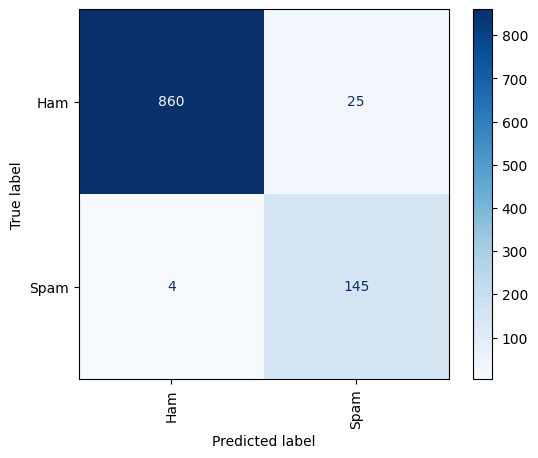

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
x = vectorizer.fit_transform(df['v2'])
y = df['v1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = MultinomialNB()
model.fit(x_train, y_train)

%matplotlib inline
cmd.from_estimator(model, x_test, y_test, display_labels=['Ham','Spam'], cmap='Blues', xticks_rotation='vertical')

In [ ]:
model.score(x_test, y_test)

0.971953578336557